# Proyecto Taxt Mining & Image Recognition

Andrea Monzon 23006810

Juan Pablo Rodas 23007521

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Datos

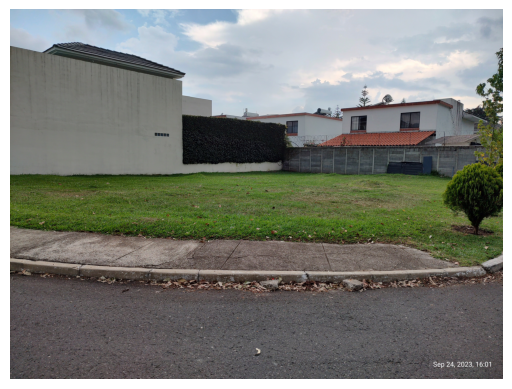

In [ ]:
imagen = cv2.imread('/content/JardinCompleto.jpg')
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
plt.imshow(imagen)
plt.axis('off')
plt.show()

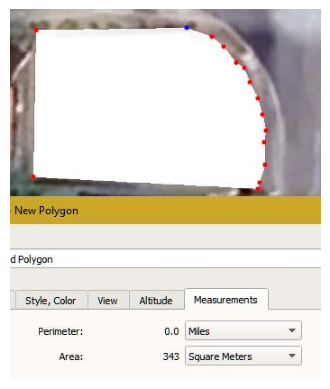

In [ ]:
imagen = cv2.imread('/content/Capture.JPG')
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
plt.imshow(imagen)
plt.axis('off')
plt.show()

Segun mediciones en Google Earth el jardin tiene aproximadamente 343m^2 de area

## Campo de Golf
<br>

Según el sitio [Golf hoyo a hoyo](https://golfhoyoahoyo.es/de-que-tamano-debe-ser-un-campo-de-golf/), las dimensiones para un campo de golf se mantienen en un rango acorde a la cantidad de hoyos en el campo. El sitio indica entonces que para que un campo de golf pueda tener 18 hoyos debe tener de 57 a 73 hectáreas de terreno. Una hectárea equivale a 10.000 metros cuadrados, lo que daría un rango de entre 570,000 a 730,000 metros cuadrados. Mientras que en el caso de los campos de 9 hoyos, es necesario tener unas 30 hectáreas de superficie, lo que daría unos 300,000 metros cuadrados.

## Pruebas y Experimentacion

pruebas para poder eliminar todo excepto los colores verde de las imagenes

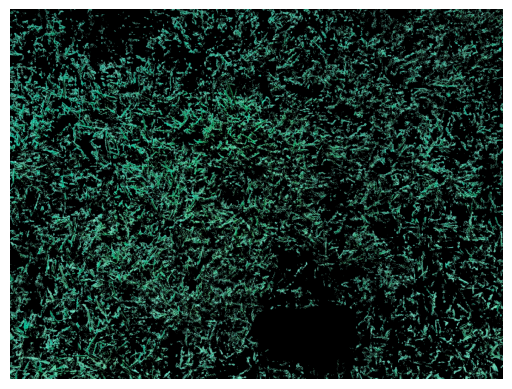

In [ ]:
imagen = cv2.imread('/content/Lejos.jpg')

verde_bajo = np.array([35, 100, 100])
verde_alto = np.array([60, 255, 255])

imagen_hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)

mascara_verde = cv2.inRange(imagen_hsv, verde_bajo, verde_alto)

mascara_no_verde = cv2.bitwise_not(mascara_verde)

imagen_negra = np.zeros_like(imagen)

imagen_negra[mascara_verde != 0] = imagen[mascara_verde != 0]

plt.imshow(imagen_negra)
plt.axis('off')
plt.show()


primera prueba de conteo de hojas en la imagen

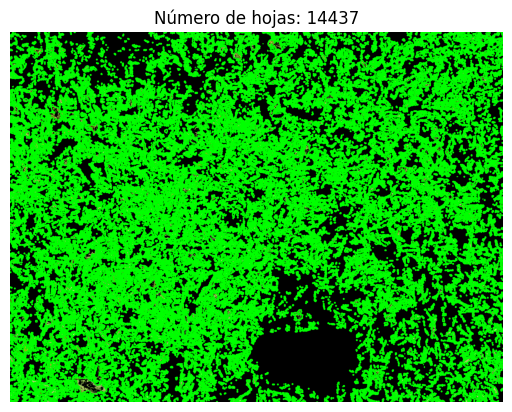

In [ ]:
# Cargar la imagen
#imagen = cv2.imread('/content/Cerca.jpg')
imagen = imagen_negra

gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
gris = cv2.Canny(gris, 100, 150)

_, umbral = cv2.threshold(gris, 100, 255, cv2.THRESH_BINARY)

contornos, _ = cv2.findContours(umbral, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(imagen, contornos, -1, (0, 255, 0), 2)

numero_de_hojas = len(contornos)

plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title(f'Número de hojas: {numero_de_hojas}')
plt.axis('off')
plt.show()


pruebas para poder determinar el area de la foto utilizando nuestra referencia

Longitud del zapato en píxeles: 400.209716796875
Ancjo del zapato en píxeles: 170.4596710205078
pixelaje: (0.074, 0.065) cm/px
area: 0.00481 cm^2/px^2
area: 5910.528 cm^2


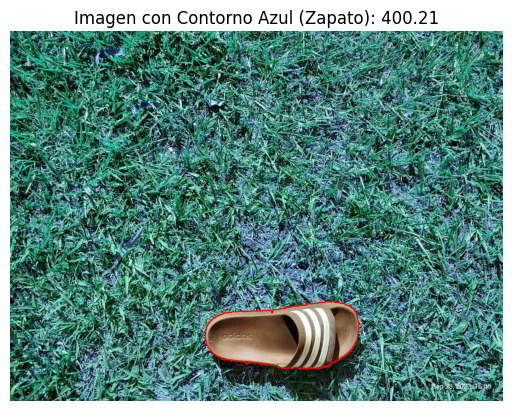

In [ ]:
imagen = cv2.imread('/content/Medio.jpg')

azul_bajo = np.array([65, 10, 10])
azul_alto = np.array([130, 255, 255])

imagen_hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)

mascara_azul = cv2.inRange(imagen_hsv, azul_bajo, azul_alto)

contornos, _ = cv2.findContours(mascara_azul, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if len(contornos) > 0:
    contorno_zapato = max(contornos, key=cv2.contourArea)
    recta_zapato = cv2.minAreaRect(contorno_zapato)
    if recta_zapato[1][0] > recta_zapato[1][1]:
        longitud_zapato_pixeles = recta_zapato[1][0]
        ancho_zapato_pixeles = recta_zapato[1][1]
    else:
        longitud_zapato_pixeles = recta_zapato[1][1]
        ancho_zapato_pixeles = recta_zapato[1][0]

    pixelaje = (round(29.5/longitud_zapato_pixeles,3),round(11/ancho_zapato_pixeles,3))
    print(f'Longitud del zapato en píxeles: {longitud_zapato_pixeles}')
    print(f'Ancjo del zapato en píxeles: {ancho_zapato_pixeles}')
    print(f'pixelaje: {pixelaje} cm/px')
    print(f'area: {round(pixelaje[0]*pixelaje[1],5)} cm^2/px^2')
    print(f'area: {round(pixelaje[0]*pixelaje[1]*imagen.shape[0]*imagen.shape[1],5)} cm^2')
else:
    print('No se encontraron contornos azules en la imagen.')

cv2.drawContours(imagen, [contorno_zapato], -1, (255, 0, 0), 2)

plt.imshow(imagen)
plt.title(f'Imagen con Contorno Azul (Zapato): {round(longitud_zapato_pixeles,2)}')
plt.axis('off')
plt.show()

pruebas y ajustes para mejorar el conteo de hojas en las imagenes

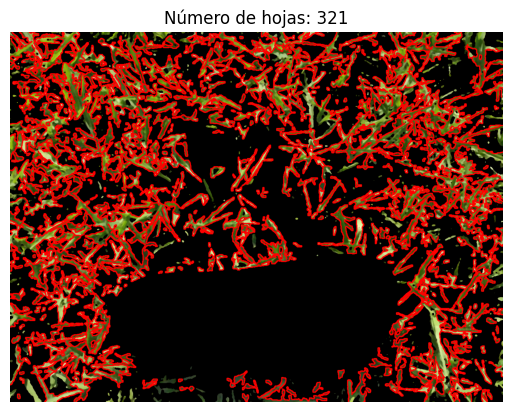

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

imagen = cv2.imread('/content/Cerca.jpg')
imagen = cv2.medianBlur(imagen,3)

verde_bajo = np.array([35, 50, 50])
verde_alto = np.array([70, 255, 255])

imagen_hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)

mascara_verde = cv2.inRange(imagen_hsv, verde_bajo, verde_alto)

imagen_negra = np.zeros_like(imagen)
imagen_negra[mascara_verde != 0] = imagen[mascara_verde != 0]

imagen2 = cv2.medianBlur(imagen_negra,5)

gris = cv2.cvtColor(imagen2, cv2.COLOR_BGR2GRAY)
gris = cv2.Canny(gris, 100, 200)

_, umbral = cv2.threshold(gris, 100, 255, cv2.THRESH_BINARY)

contornos, _ = cv2.findContours(umbral, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

min_area = 35
max_area = 100000
min_aspect_ratio = 1
max_aspect_ratio = 4

filtered_contours = []
for contour in contornos:
    area = cv2.contourArea(contour)
    rect = cv2.minAreaRect(contour)
    width = float(rect[1][0])
    height = float(rect[1][1])
    aspect_ratio2 = 0
    if(width >= height):
      aspect_ratio = width / height if height != 0 else 0
    else:
      aspect_ratio = height / width if width != 0 else 0
    if area >= min_area and area <= max_area and aspect_ratio >= min_aspect_ratio and aspect_ratio <= max_aspect_ratio:
        filtered_contours.append(contour)

cv2.drawContours(imagen2, filtered_contours, -1, (0, 0, 255), 2)

numero_de_hojas = len(filtered_contours)

plt.imshow(cv2.cvtColor(imagen2, cv2.COLOR_BGR2RGB))
plt.title(f'Número de hojas: {numero_de_hojas}')
plt.axis('off')
plt.show()


## Resultados

In [ ]:
def CalcularDensidad(img1,img2,AreaEst):
  '''
  Esta funcion tiene como entrada, dos imagenes de jardin con una referencia para medir (una chancla azul)
  estas imagenes deben ser una imagen cerca (img1) y una lejos (img2) y tambien recibe de entrada el area a
  estimar el conteo de grama, area ingresada en m^2

  La salida es un rango de valores de cuantas hojas de grama hay en este campo
  '''

  # Conteo de hoja de grama en las imagenes =======================================================

  # Filtros de media para quitar un poco el ruido de las imagenes
  img1 = cv2.medianBlur(img1,3)
  img2 = cv2.medianBlur(img2,3)

  # Se definen en HSV el rango de verdes a filtrar en la imagen
  verde_bajo = np.array([35, 50, 50])  # Valor mínimo de verde
  verde_alto = np.array([70, 255, 255])  # Valor máximo de verde

  img1_hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
  img2_hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)

  img1_msk_verde = cv2.inRange(img1_hsv, verde_bajo, verde_alto)
  img2_msk_verde = cv2.inRange(img2_hsv, verde_bajo, verde_alto)
  #img1_msk_no_verde = cv2.bitwise_not(img1_msk_verde)
  #img2_msk_no_verde = cv2.bitwise_not(img2_msk_verde)

  # definimos las nuevas imagenes que tendran unicamente el color verde
  new_img1 = np.zeros_like(img1)
  new_img2 = np.zeros_like(img2)
  new_img1[img1_msk_verde != 0] = img1[img1_msk_verde != 0]
  new_img2[img2_msk_verde != 0] = img2[img2_msk_verde != 0]
  new_img1 = cv2.medianBlur(new_img1,5) #filtro para eliminar ruido
  new_img2 = cv2.medianBlur(new_img2,5) #filtro para eliminar ruido

  # se buscan los contornos en la imagen
  img1_gris = cv2.cvtColor(new_img1, cv2.COLOR_BGR2GRAY)
  img2_gris = cv2.cvtColor(new_img2, cv2.COLOR_BGR2GRAY)
  cont_img1 = cv2.Canny(img1_gris, 100, 200)
  cont_img2 = cv2.Canny(img2_gris, 100, 200)
  ret1, th1 = cv2.threshold(cont_img1, 100, 255, cv2.THRESH_BINARY)
  ret2, th2 = cv2.threshold(cont_img2, 100, 255, cv2.THRESH_BINARY)
  cont1, _ = cv2.findContours(th1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cont2, _ = cv2.findContours(th2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # se filtraran los contornos por area y aspect ratio
  # filtro para imagen cercana
  min_area = 35
  max_area = 100000
  min_aspect_ratio = 1
  max_aspect_ratio = 4

  filtered_contours_img1 = []
  filtered_contours_img2 = []

  for contour in cont1:
    area = cv2.contourArea(contour)
    rect = cv2.minAreaRect(contour)
    width = float(rect[1][0])
    height = float(rect[1][1])
    if(width >= height):
      aspect_ratio = width / height if height != 0 else 0
    else:
      aspect_ratio = height / width if width != 0 else 0
    if area >= min_area and area <= max_area and aspect_ratio >= min_aspect_ratio and aspect_ratio <= max_aspect_ratio:
        filtered_contours_img1.append(contour)

  # filtro para imagen lejana
  min_area = 9
  max_area = 100000
  min_aspect_ratio = 0.3
  max_aspect_ratio = 5

  for contour in cont2:
    area = cv2.contourArea(contour)
    rect = cv2.minAreaRect(contour)
    width = float(rect[1][0])
    height = float(rect[1][1])
    if(width >= height):
      aspect_ratio = width / height if height != 0 else 0
    else:
      aspect_ratio = height / width if width != 0 else 0
    if area >= min_area and area <= max_area and aspect_ratio >= min_aspect_ratio and aspect_ratio <= max_aspect_ratio:
        filtered_contours_img2.append(contour)

  # dibuja los contornos
  cv2.drawContours(new_img1, filtered_contours_img1, -1, (0, 0, 255), 2)
  cv2.drawContours(new_img2, filtered_contours_img2, -1, (0, 0, 255), 2)

  # cuenta las hojas
  numero_de_hojas_img1 = len(filtered_contours_img1)
  numero_de_hojas_img2 = len(filtered_contours_img2)

  # muestra las imagenes
  fig, axs = plt.subplots(1, 2, figsize=(10, 5))
  axs[0].imshow(cv2.cvtColor(new_img1, cv2.COLOR_BGR2RGB))
  axs[0].set_title(f'Número de hojas: {numero_de_hojas_img1}')
  axs[0].axis('off')
  axs[1].imshow(cv2.cvtColor(new_img2, cv2.COLOR_BGR2RGB))
  axs[1].set_title(f'Número de hojas: {numero_de_hojas_img2}')
  axs[1].axis('off')
  #================================================================================================

  # Medida de area abarcada en la imagen ==========================================================
  # nuestra referencia en las imagenes es la chancla azul por la que sabiendo las dimensiones de
  # esta podemos calcular cuanta area hay en la imagen

  largo_chancla = 29.5 #cm
  ancho_chacla = 11 #cm
  # Se definen en HSV el rango de azul a filtrar en la imagen
  azul_bajo = np.array([65, 10, 10])  # Valor mínimo de azul
  azul_alto = np.array([130, 255, 255])  # Valor máximo de azul

  # Crear una máscara que identifique los píxeles azules
  img1_msk_azul = cv2.inRange(img1_hsv, azul_bajo, azul_alto)
  img2_msk_azul = cv2.inRange(img2_hsv, azul_bajo, azul_alto)

  # Encontrar contornos en la máscara azul
  cont_zap1, _ = cv2.findContours(img1_msk_azul, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cont_zap2, _ = cv2.findContours(img2_msk_azul, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Seleccionar el contorno más largo (que debería ser la chancla) en cada imagen
  contorno_chancla1 = max(cont_zap1, key=cv2.contourArea)
  contorno_chancla2 = max(cont_zap2, key=cv2.contourArea)

  # Encontrar la línea recta que cubre el contorno del zapato
  rect_chan1 = cv2.minAreaRect(contorno_chancla1)
  rect_chan2 = cv2.minAreaRect(contorno_chancla2)

  # Obtener la longitud de la línea recta (mayor de los dos lados)
  if rect_chan1[1][0] > rect_chan1[1][1]:
      longitud_zapato1_pixeles = rect_chan1[1][0]
      ancho_zapato1_pixeles = rect_chan1[1][1]
  else:
      longitud_zapato1_pixeles = rect_chan1[1][1]
      ancho_zapato1_pixeles = rect_chan1[1][0]

  if rect_chan2[1][0] > rect_chan2[1][1]:
      longitud_zapato2_pixeles = rect_chan2[1][0]
      ancho_zapato2_pixeles = rect_chan2[1][1]
  else:
      longitud_zapato2_pixeles = rect_chan2[1][1]
      ancho_zapato2_pixeles = rect_chan2[1][0]

  # Calcula el area de la imagen basandose en las dimensiones de la chancla
  pix1 = (largo_chancla/longitud_zapato1_pixeles)*(ancho_chacla/ancho_zapato1_pixeles)
  pix2 = (largo_chancla/longitud_zapato2_pixeles)*(ancho_chacla/ancho_zapato2_pixeles)

  area1 = pix1*img1.shape[0]*img1.shape[1] - cv2.contourArea(contorno_chancla1)*pix1 #calcula el area y resta el area que abarca la chancla
  area2 = pix2*img2.shape[0]*img2.shape[1] - cv2.contourArea(contorno_chancla2)*pix2 #calcula el area y resta el area que abarca la chancla
  #================================================================================================

  # Calculo de densidades =========================================================================
  Dens1 = numero_de_hojas_img1/area1
  Dens2 = numero_de_hojas_img2/area2

  AreaEstcm2 = AreaEst*10000 # convierte a cm^2

  est1 = round(AreaEstcm2*Dens1)
  est2 = round(AreaEstcm2*Dens2)

  if est1>est2:
    rango = (est2,est1)
  else:
    rango = (est1,est2)
  #================================================================================================

  return rango

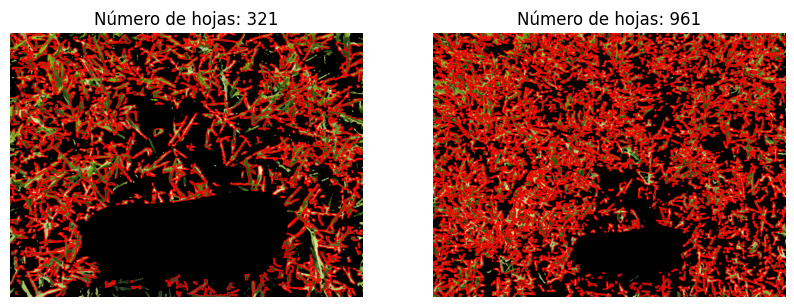

In [ ]:
imagenA = cv2.imread('/content/Cerca.jpg')
imagenB = cv2.imread('/content/Medio.jpg')
areaJardin = 340

range = CalcularDensidad(imagenA, imagenB, areaJardin)

In [ ]:
print(f'Para un jardin de {areaJardin} m^2 se estima que pueden haber entre {range} hojas de grama')

Para un jardin de 340 m^2 se estima que pueden haber entre (592484, 742428) hojas de grama


## Estimacion para un campo de Golf

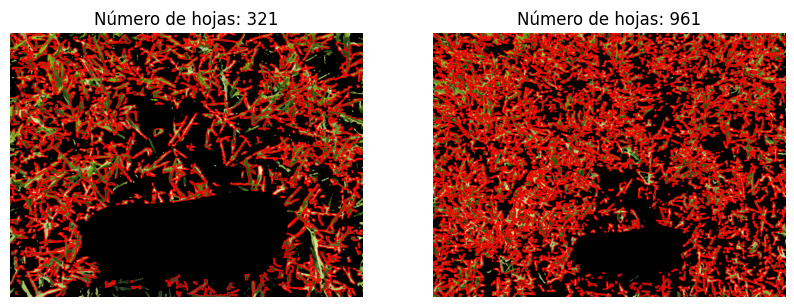

In [ ]:
imagenA = cv2.imread('/content/Cerca.jpg')
imagenB = cv2.imread('/content/Medio.jpg')
areaCampo = 300000 #aproximacion de area en m^2 de un campo de golf

GolfRange = CalcularDensidad(imagenA, imagenB, areaCampo)

In [ ]:
print(f'Para un campo de golf de {areaCampo} m^2 se estima que pueden haber entre {GolfRange} hojas de grama')

Para un campo de golf de 300000 m^2 se estima que pueden haber entre (522780417, 655083510) hojas de grama
